In [1]:
import numpy as np
import matplotlib.pyplot as plt


data_all = open('data.txt').read().split()
data = np.asarray(data_all).astype(np.float32)

n = 256
elements = n**2


A = data[:elements].reshape((n, n))
B = data[elements:2*elements].reshape((n, n))
G = data[2*elements:].reshape((n, n))
plt.imshow(G,cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

## Before we start we perform SVD to small matrices: A and B

## Take advantage of kronecker product and compute g estimate and Σ diagonal matrix


**We want to compute g hat:**

\begin{align}
\hat{g} = U^Tg 
\end{align}

**We know that U can be written as Kronecker product of UA and UB:**

\begin{align}
U = U_A \otimes U_B
\end{align}

**So equilevantly we write:**

\begin{align}
\hat{g} = (U_A \otimes U_B)^Tg
\end{align}


**With the help of this property:**

\begin{align}
(A \otimes B)^T = A^T \otimes B^T  
\end{align}

**So equilevantly we write:**

\begin{align}
\hat{g} = (U_A^T \otimes U_B^T)g
\end{align}

Also another property of Kronecker product says that for a system holds:

\begin{align}
AXB = C \Leftrightarrow (B^T \otimes A)vec(X) = vec(C)
\end{align}

where **vec(X)** denotes the vectorization of the matrix X formed by stacking the columns of X into a single column vector

Finally we can derive g estimate as:

\begin{align}
\hat{g} = (U_B^TgU_A)
\end{align}

where correspondigly the matrices are:

\begin{align}
U_B^T = A
\end{align}

\begin{align}
g = X
\end{align}

\begin{align}
U_A = B
\end{align}

**The same property is useful for the computation with matrix V**

**Also, it is clear that the Kronecker product of two diagonal matrices is a diagonal matrix. So we can save this diagonal matrix as a vector.**

\begin{align}
Σ = Σ_Α \otimes Σ_Β
\end{align}


**It holds that for two vectors a, b:**

\begin{align}
a b^T = a \otimes b^T = b^T \otimes a
\end{align}

**That means we just need to compute the outer product of the vectors:** 
\begin{align}
Σ = Σ_Β Σ_Α^Τ
\end{align}

where 
\begin{align}
Σ_Α, Σ_Β
\end{align}

**are the vectors returned by the SVD method.**



## 1. We use Tikhonov regularization by trying many values of alpha and visualize the results to choose the clearest image.

**To find f hat we use the closed form solution (proved in Problem 3)**


\begin{align}
\hat{f} = σ_i \hat{g} / (σ_i^2 + α^2)
\end{align}

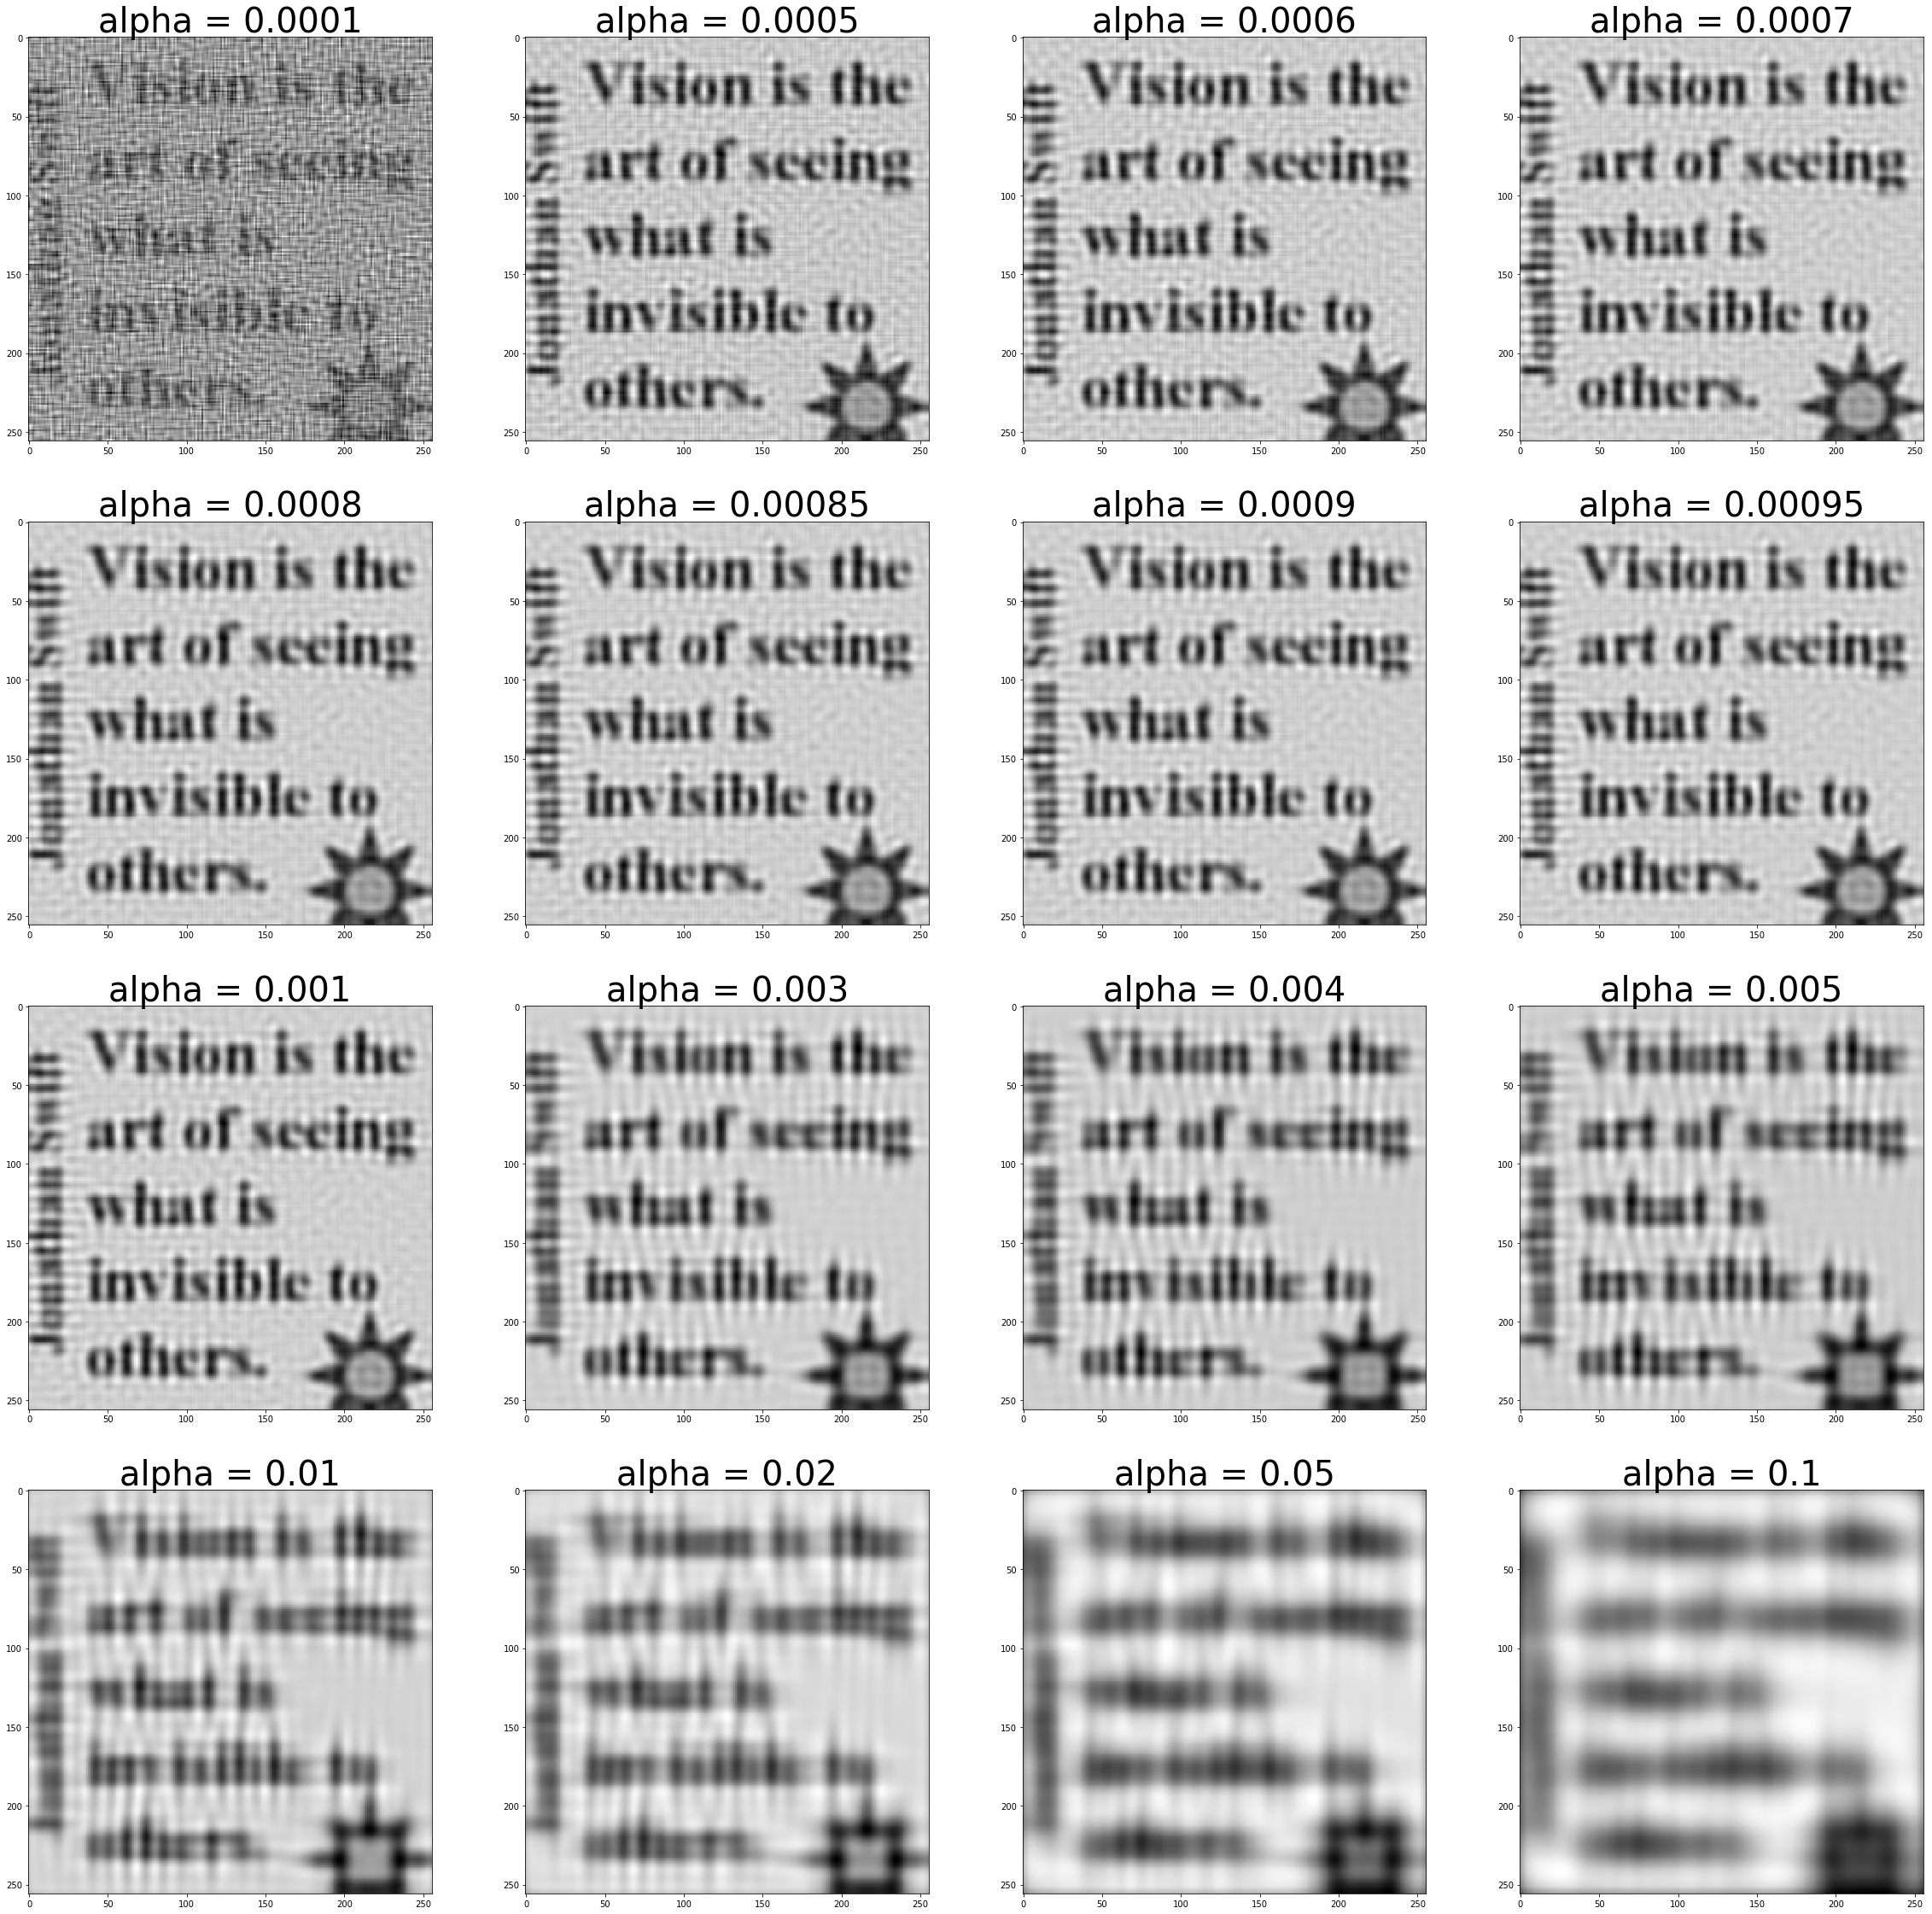

In [2]:
from scipy.linalg import svd

UA, SA, VhA = svd(A)
UB, SB, VhB = svd(B)


g_hat = np.dot(np.dot(UB.T,G),UA)
Sigma = np.outer(SB, SA.T)


fig=plt.figure(figsize=(40, 40))

alpha = np.array([0.0001, 0.0005, 0.0006, 0.0007, 0.0008, 0.00085, 0.0009,0.00095, 0.001, 0.003, 0.004, 0.005, 0.01, 0.02, 0.05, 0.1])

for i in range(alpha.shape[0]):
    f_hat = Sigma*g_hat / ((Sigma*Sigma) + alpha[i]**2)
    F = np.dot(np.dot(VhB.T,f_hat),VhA)
    fig.add_subplot(4,4, i+1)
    plt.title("alpha = {}".format(alpha[i]), fontsize=40)
    plt.imshow(F,cmap='gray')

## 2. Use TSVD regularization to reconstruct the image.

**For a = 0 for the below type**

\begin{align}
\hat{f} = σ_i \hat{g} / (σ_i^2 + α^2)
\end{align}


**we get:**

\begin{align}
\hat{f} = \hat{g} / σ_i 
\end{align}

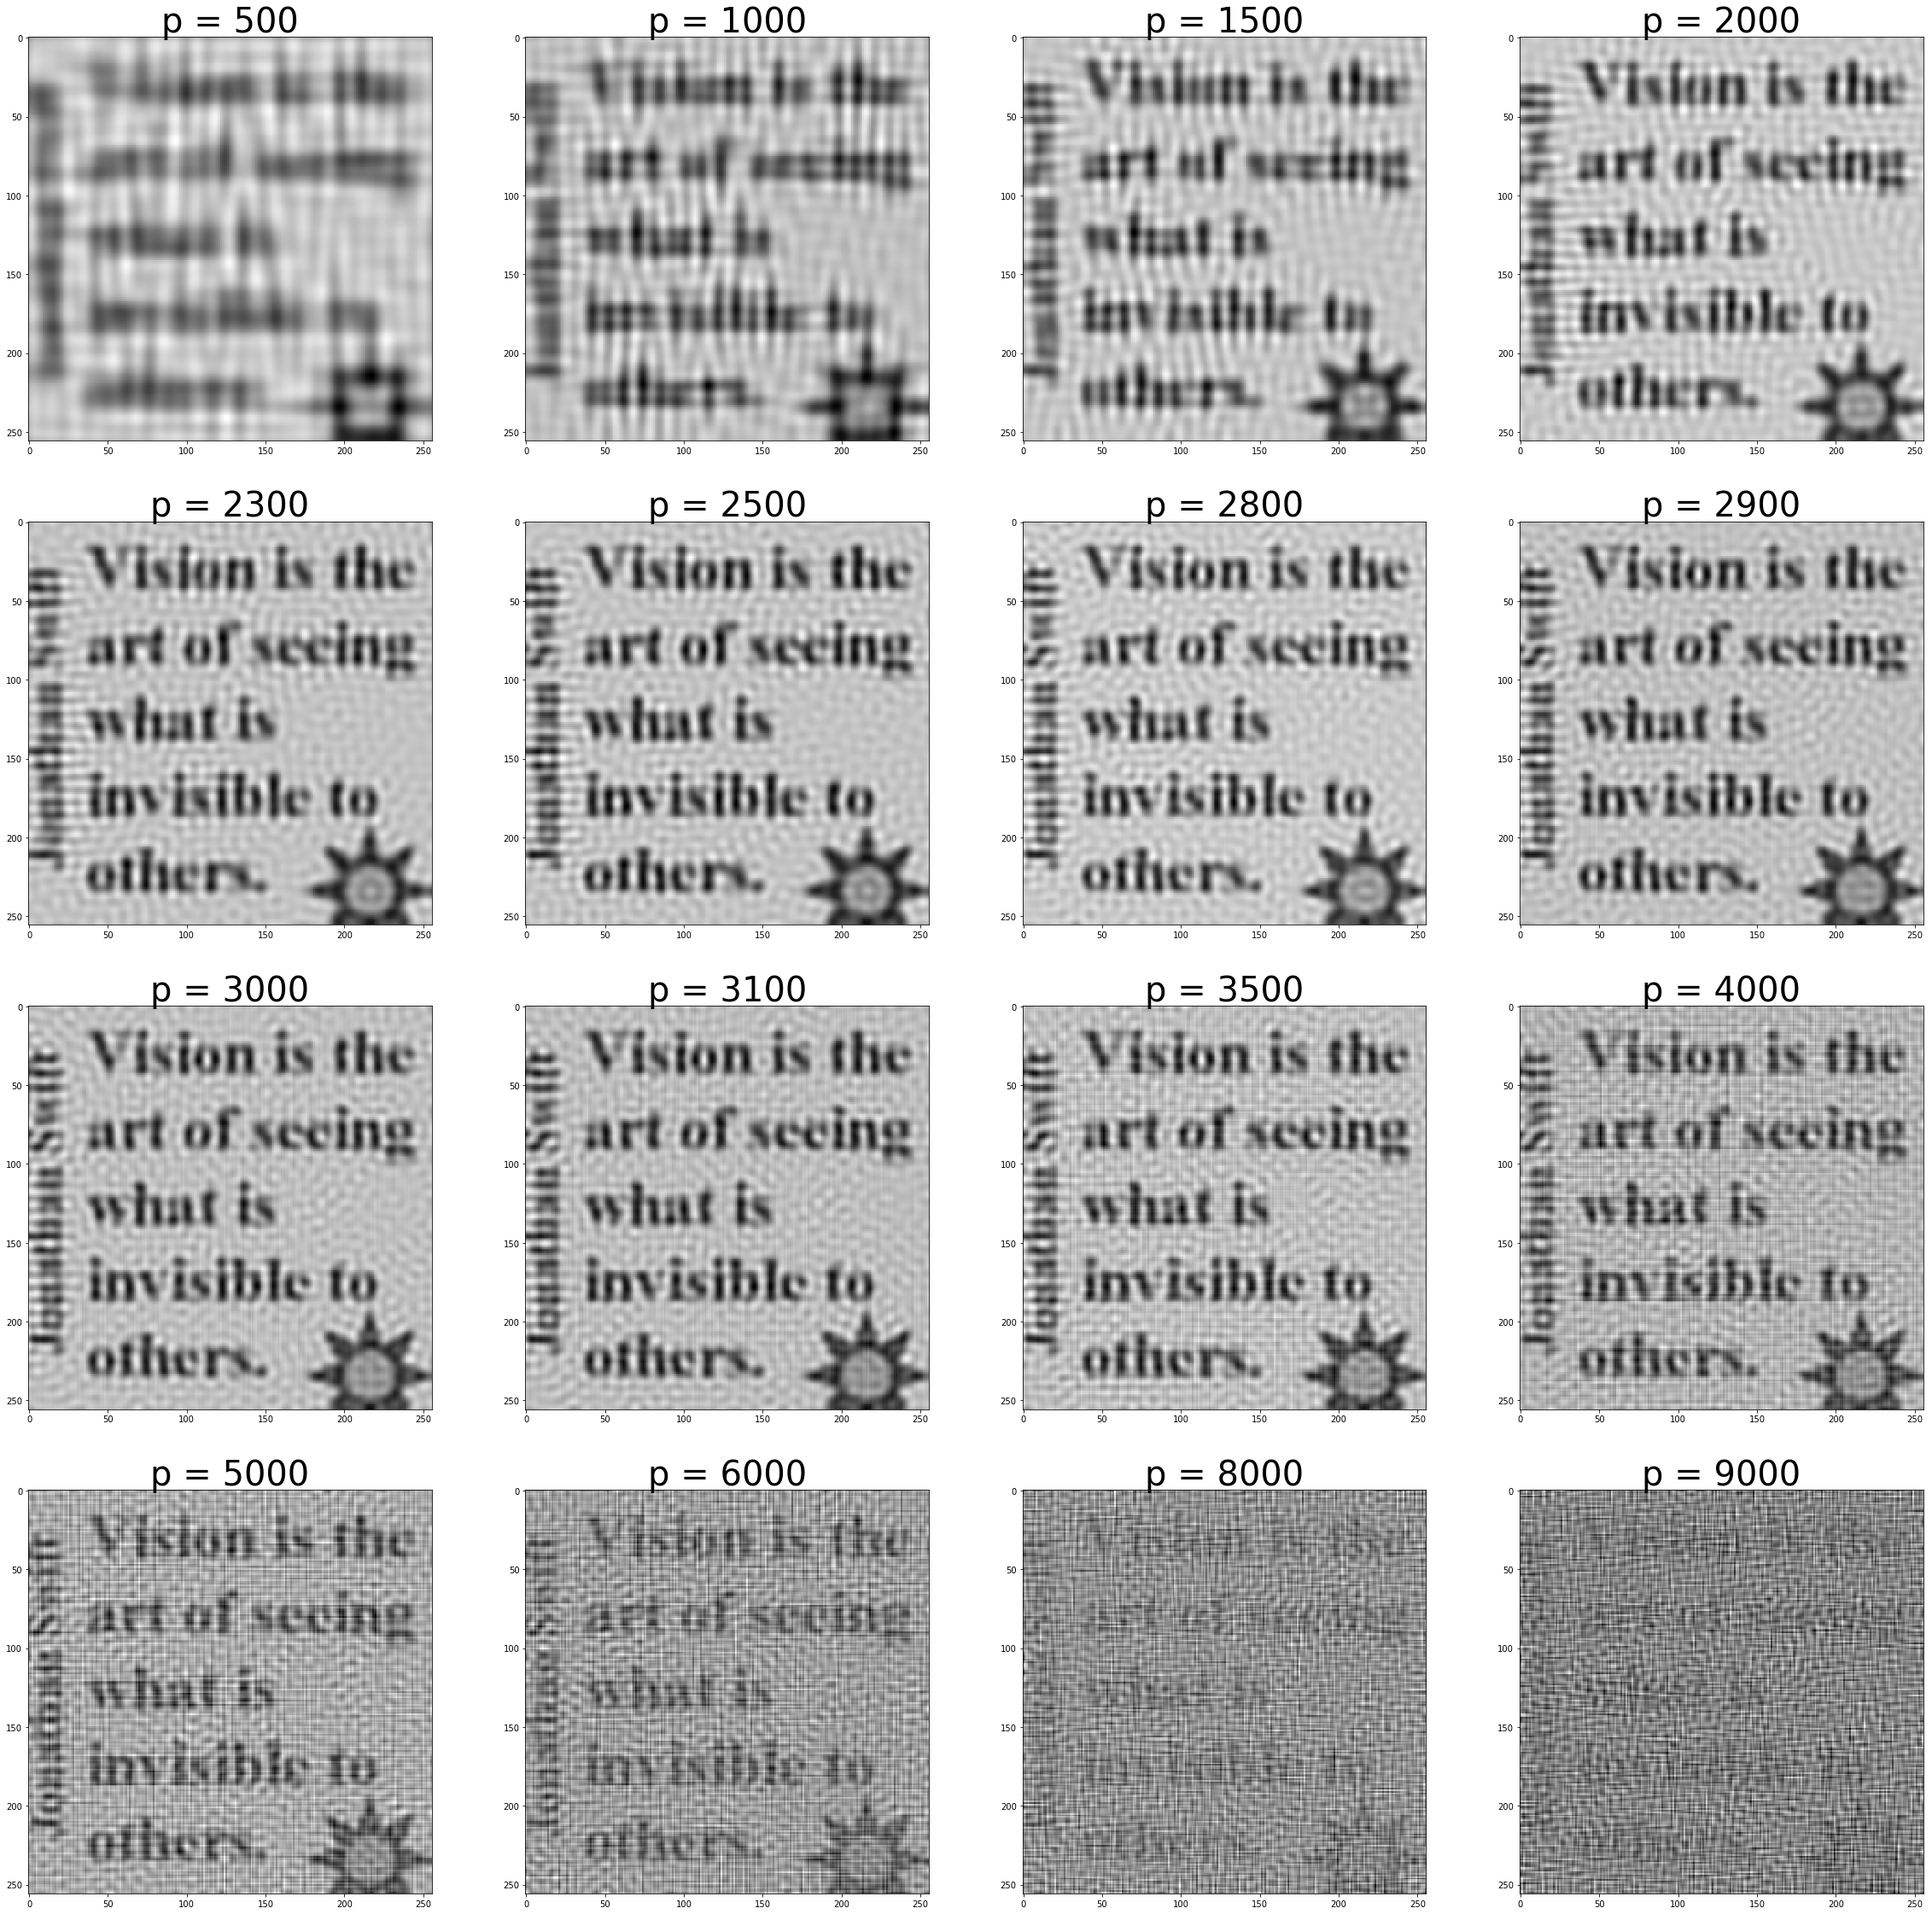

In [3]:
from scipy.linalg import svd

UA, SA, VhA = svd(A)
UB, SB, VhB = svd(B)

g_hat = np.dot(np.dot(UB.T,G),UA)
Sigma = np.outer(SB, SA.T)

s = Sigma.reshape(n**2,1)

pos = np.argsort(s,axis=0)
pos_sorted = np.flipud(pos)

ss = np.sort(s)
len_ss = ss.shape[0]
ipos = np.zeros(len_ss,dtype=np.int16)
# column vector
ipos[pos_sorted] = np.arange(0,len_ss)[:, np.newaxis]

p_set = np.array([500, 1000, 1500, 2000, 2300, 2500, 2800, 2900, 3000, 3100, 3500, 4000, 5000, 6000, 8000, 9000])

fig = plt.figure(figsize=(40, 40))

for i in range(p_set.shape[0]):
     
    p = p_set[i]   
    ss_new = np.array(ss)
    # fill with zeros after p position
    ss_new[p:] = 0
    S_new = ss_new[ipos].reshape(n,n)

    f_hat = g_hat/ Sigma
    Fnew = f_hat * (S_new>0)
    F = np.dot(np.dot(VhB.T,Fnew),VhA)
    
    fig.add_subplot(4,4, i+1)
    plt.title("p = {}".format(p_set[i]),fontsize=40)
    plt.imshow(F,cmap='gray')